In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


4431872/4422102 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y =(60000,)
Test: X=(10000, 28, 28), y =(10000,)


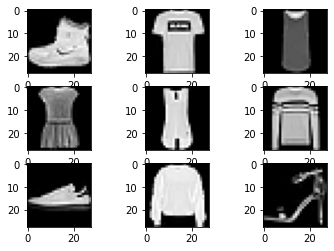

In [2]:
#preview dataset

from matplotlib import pyplot
from keras.datasets import fashion_mnist
from PIL import Image
import numpy
#load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# summarize loaded dataset

print('Train: X=%s, y =%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y =%s' % (testX.shape, testy.shape))

# plot first few images

for i in range(9):
  #define subplot
  pyplot.subplot(330 + 1 + i)
  #plot raw pixel data
  pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
  
pyplot.show()

(unique, counts) = numpy.unique(testy, return_counts=True)
frequencies = numpy.asarray((unique, counts)).T

In [ ]:
import pandas as pd 

df = pd.DataFrame(frequencies, columns=['label', 'count'])
df

,label,count
0,0,1000
1,1,1000
2,2,1000
3,3,1000
4,4,1000
5,5,1000
6,6,1000
7,7,1000
8,8,1000
9,9,1000


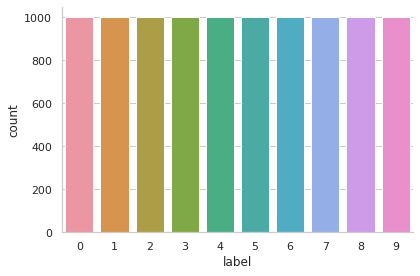

In [ ]:
import seaborn as sns
# import matplotlib
# from matplotlib import pyplot as plt

sns.set(context="notebook", palette="Accent", style = 'whitegrid' , color_codes=True)
sns.catplot(x='label', y='count', data=df, height=4, kind='bar', aspect=1.5)

In [3]:
import numpy as np
import pandas as pd
import math 
import itertools

from sklearn.metrics import confusion_matrix, classification_report
# Deep Learning Libraries
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation
# from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from numpy import mean
import keras
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno
from keras.utils.vis_utils import plot_model

In [4]:
#load train and test dataset

#load dataset
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

#reshape dataset to have a single channel
trainX = trainX.reshape(trainX.shape[0], 28, 28, 1)
testX = testX.reshape(testX.shape[0], 28, 28, 1)
#one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)
#convert from integers to floats
trainX = trainX.astype('float32')
testX = testX.astype('float32')

trainX = trainX/255.0
testX = testX/255.0


In [5]:
def poly_decay(epoch):
    # initialize the maximum number of epochs, base learning rate,
    # and power of the polynomial
    maxEpochs = 60
    baseLR = 5e-3
    power = 1.0

    # compute the new learning rate based on polynomial decay
    alpha = baseLR * (1 - (epoch / float(maxEpochs))) ** power

    # return the new learning rate
    return alpha

reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

datagen = ImageDataGenerator(
        rotation_range = 5,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        shear_range = 0.3,# shear angle in counter-clockwise direction in degrees  
        horizontal_flip=True)
datagen.fit(trainX)


In [6]:
#define cnn model

inputShape = (28, 28, 1)
channelDimension = -1
classes = 10
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=inputShape))
model.add(Activation("relu"))
# model.add(BatchNormalization(axis=channelDimension))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
# model.add(BatchNormalization(axis=channelDimension))
# model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
# model.add(BatchNormalization(axis=channelDimension))

model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

#FC -> RELU layers
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
model.add(Dense(classes))
model.add(Activation("softmax"))

#compile model
# Optimizer
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999 )
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 28, 28, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 activation_2 (Activation)   (None, 28, 28, 128)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0

In [ ]:
ls '/content/drive/My Drive'

In [ ]:
# history = model.fit(trainX, trainY, batch_size = 32, epochs = 20, 
#                               validation_data = (testX, testY), verbose=2, callbacks = [reduce_lr])
history = model.fit(datagen.flow(trainX, trainY, batch_size = 128), epochs = 25, 
                              validation_data = (testX, testY), verbose=2, 
                              steps_per_epoch=trainX.shape[0] // 128,
                              callbacks = [reduce_lr])
# model.save('/content/drive/My Drive/modified_minivgg_with_data_augmentation.h5')

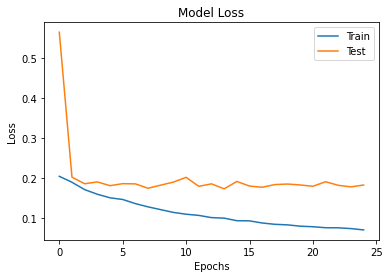

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()
plt.savefig('model_loss.png')

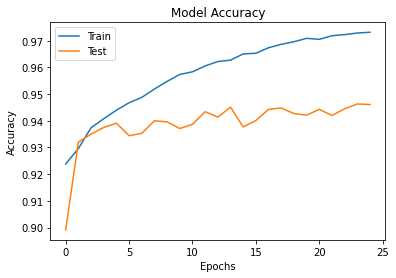

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()
plt.savefig('model_accuracy.png')

In [ ]:
score = model.evaluate(trainX, trainY)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

1875/1875 [==============================] - 15s 8ms/step - loss: 0.0356 - accuracy: 0.9915
Loss: 0.0356
Accuracy: 0.9915


In [ ]:
score = model.evaluate(testX, testY)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

313/313 [==============================] - 3s 9ms/step - loss: 0.1834 - accuracy: 0.9461
Loss: 0.1834
Accuracy: 0.9461


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

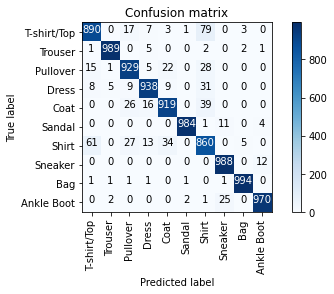

In [ ]:
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset
Y_pred = model.predict(testX)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(testY,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, 
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])

plt.savefig('confusion_matrix.png')

In [ ]:
labelNames = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
predictions = model.predict(testX, batch_size = 64)
print(classification_report(testY.argmax(axis = 1),
    predictions.argmax(axis = 1), target_names = labelNames))

              precision    recall  f1-score   support

 T-shirt/top       0.91      0.89      0.90      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.92      0.93      0.92      1000
       Dress       0.95      0.94      0.95      1000
        Coat       0.93      0.92      0.93      1000
      Sandal       1.00      0.98      0.99      1000
       Shirt       0.83      0.86      0.84      1000
     Sneaker       0.96      0.99      0.98      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.98      0.97      0.98      1000

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [ ]:
clothing = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

Label:  Bag
Predict:  Bag


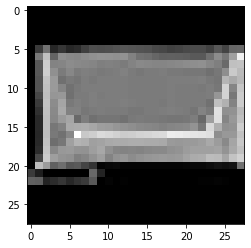

In [ ]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import random
import numpy as np
from matplotlib import pyplot
# load and prepare the image
def load_image(filename):
  # load the image
  # reshape into a single sample with 1 channel
  img = filename.reshape(1, 28, 28, 1)
  # prepare pixel data
  img = img.astype('float32')
  img = img / 255.0
  return img
# load an image and predict the class
def run_example():
  # load the image
  num = random.randint(0, 9999)
  img = load_image(testX[num])
  # print(testy[num])
  print("Label: ", clothing[testy[num]])
  # load model
  model = load_model('/content/drive/My Drive/modified_minivgg_with_data_augmentation.h5')
  # predict the class
  # result = model.predict_classes(img)
  result = np.argmax(model.predict(img), axis=-1)
  print("Predict: ", clothing[result[0]])
  pyplot.imshow(testX[num], cmap=pyplot.get_cmap('gray'))
  
# entry point, run the example
run_example()